<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                     

rcol = L0/np.sqrt(-colr**2+1)+L0*colr**2/(-colr**2+1)**(3/2)

rrcol = 3*L0*colr/(-colr**2+1)**(3/2)+3*L0*colr**3/(-colr**2+1)**(5/2)


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+1,N+1])
rSB = np.zeros([N+1,N+1])
rrSB = np.zeros([N+1,N+1])
colSB = np.zeros([N+1,N+1])
ccolSB = np.zeros([N+1,N+1])


Phi = np.zeros([N+1,N+1])
Pi = np.zeros([N+1,N+1])
Krr = np.zeros([N+1,N+1])
Chi = np.zeros([N+1,N+1])
alpha = np.zeros([N,N])
beta = np.zeros([N,N])

for i in range(N+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

colSB[0,] = 0
colSB[1,] = 1
rSB[0,] = rcol*colSB[0,]
rSB[1,] = rcol*colSB[1,]

for i in range(1, N+1):
  colSB[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
  rSB[i,] = rcol*colSB[i,]                                                    # colSB[i,] = dSB[i,]/dcol, rcol = dcol/dr


ccolSB[0,] = 0
ccolSB[1,] = 0
rrSB[0,] = rrcol*colSB[0,] + (rcol)**2 * ccolSB[0,]
rrSB[1,] = rrcol*colSB[1,] + (rcol)**2 * ccolSB[1,]

for i in range(1, N+1):
  ccolSB[i,] = 2*colSB[i-1,] + 2*colr*ccolSB[i-1,] + 2*colSB[i-1,] - ccolSB[i-2,]
  rrSB[i,] = rrcol*colSB[i,] + (rcol)**2 * ccolSB[i,]                         # ccolSB[i,] = d²SB[i,]/dcol²


#rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))


#rrSB[i,] = np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)*2)



# Derivada Matriz Base:

#colT[0,] = 0
#colT[1,] = 1

#xT[0,] = xcol*colT[0,]
#xT[1,] = xcol*colT[1,]

#for i in range(2, N+2):
 # colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  #xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

#psi = T[0:N,:]   
#xpsi = xT[0:N,:]


# Initial conditions of Phi                                       # PhI initial

r0 = 0.5

A0 = 0.0001

Phi_0 = A0*r**2*np.exp(-(r-r0)**2)            # Phi initial



inv_SB = np.linalg.inv(SB)
  
a0 = np.dot(Phi_0, inv_SB)  # coeficients a(0)



Phi = np.dot(a0, SB)      # approximative solution in t=0

rPhi= np.dot(a0, rSB)

rrPhi = np.dot(a0, rrSB)


In [44]:
a0

array([ 4.41972193e-05,  3.06914923e-06, -3.28346338e-05,  1.80421021e-05,
        4.40701527e-06, -6.30267467e-06, -3.78923648e-07,  1.29529468e-06,
        4.43917105e-07, -3.28952492e-07, -1.59805988e-07, -7.93504613e-10,
        7.42604275e-08,  1.13806961e-08, -1.99719475e-09, -1.63668189e-08,
        1.18387912e-09, -1.26198105e-09,  4.66003336e-09, -1.41006969e-09,
        1.30447618e-09, -1.75659757e-09,  8.99503922e-10, -8.35786224e-10,
        7.90846522e-10, -5.11759679e-10,  4.48230350e-10, -3.52596991e-10,
        2.31169609e-10, -1.64243585e-10,  7.75567187e-11])

In [8]:
# Plot: Initial Conditions

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, SBplot)

erro = (Phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


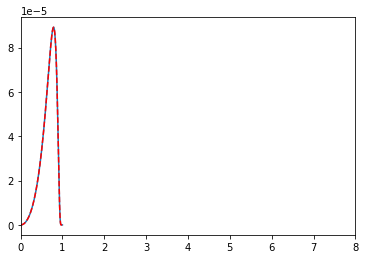

In [24]:
plt.plot(colplot, Phiplot, colplot, Phi_plot0, "--r")
plt.xlim(0,8)
plt.show()

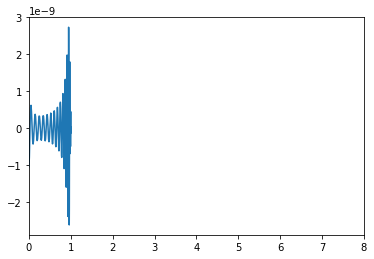

In [25]:
plt.plot(colplot, erro)
plt.xlim(0,8)
plt.show()

In [ ]:
# Field equations:



In [63]:
# Initial values of PI:

Pi_0 = 0

b0 = np.dot(Pi_0, inv_SB)

Pi = np.dot(b0, SB) 

In [62]:
Pi_0

0

In [46]:
# Initial values of Krr:

Krr_0 = 0


#for i in range(2,N+1):
#  SB[i,] = 2*SB[i-1,] - SB[i-2,]

psi =  SB[0:N+1,:] 

inv_psi = np.linalg.inv(psi)

ck0 = np.dot(Krr_0, inv_psi)

Krr = np.dot(ck0, SB) 

In [58]:
# Initial chi: solving the Hamiltonian constraint:



for i in range(N+1):
  c0[i] = 0.001

Nt = 5

for i in range(N+1):
  


Chi = np.dot(c0, SB) 

rChi = np.dot(c0, rSB)

rrChi = np.dot(c0, rrSB)

# We obtain the modes first and the values.



In [64]:
Chi

array([2.00493671e-02, 2.49539626e-05, 6.67203632e-03, 5.00325463e-05,
       3.98990528e-03, 7.53628741e-05, 2.83564091e-03, 1.01077181e-04,
       2.19064313e-03, 1.27315644e-04, 1.77710564e-03, 1.54229574e-04,
       1.48817438e-03, 1.81985117e-04, 1.27397922e-03, 2.10767674e-04,
       1.10811383e-03, 2.40787309e-04, 9.75286082e-04, 2.72285488e-04,
       8.66025404e-04, 3.05543640e-04, 7.74151422e-04, 3.40894228e-04,
       6.95457651e-04, 3.78735282e-04, 6.26980169e-04, 4.19549816e-04,
       5.66568876e-04, 4.63932202e-04, 5.12624679e-04])

In [ ]:
# Initial values of alpha:

alpha_0 = 

al0 = np.dot(alpha_0, inv_SB)

alpha = 1 + np.dot(al0, SB)

In [ ]:
# Initial values of beta:

beta_0 = 

be0 = np.dot(beta_0, inv_SB)

beta = np.dot(be0, SB)